# <center> Best place for a Pharmacy in Rio de Janeiro

**This Jupyter notebook is a part of the Capstone project from IBM DATASCIENCE**

# Table Contents

<ul>
    <li><a href="#DATA EXTRACTION / DATA CLEANING">DATA EXTRACTION / DATA CLEANING</a></li>
    <li><a href="#LOAD DATASETS">LOAD DATASETS</a></li>
    <li><a href="#MERGE DATASETS">MERGE DATASETS</a></li>
    <li><a href="#DATA ANALYSIS">DATA ANALYSIS</a></li>
    <li><a href="#USE FOURSQUARE API">USE FOURSQUARE API</a></li>
    <li><a href="#CLUSTERIZATION">CLUSTERIZATION</a></li>
    <li><a href="#CLUSTER ANALYSIS">CLUSTER ANALYSIS</a></li>
    <li><a href="#CONCLUSION">CONCLUSION</a></li>
</ul>

# Setup Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import requests
import folium
from sklearn import preprocessing

## Data Extraction / Data Cleaning

**The Extraction and the Formation of the data was done in separate notebooks <br> Here is the folowing links :** 

 [Link to Neighbourhood Extraction](https://github.com/Vapb/Coursera_Capstone/blob/master/Rio/Neighbourhood%20Extraction.ipynb) <br> 

[Link to IDH from each Neighbourhood Extraction](https://github.com/Vapb/Coursera_Capstone/blob/master/Rio/IDH%20Extraction.ipynb) <br>

[Link to Number of Hospitals Neighbourhood Extraction](https://github.com/Vapb/Coursera_Capstone/blob/master/Rio/SUS%20Data%20Cleaning.ipynb) <br>

[Link to Density each Neighbourhood Extraction](https://github.com/Vapb/Coursera_Capstone/blob/master/Rio/Density%20Extraction.ipynb) <br>


## Load Datasets

**Population Density** : This dataset is a combination of Demographics of each neighbourhood of RIO <br>
<ul>
  <li>Bairro = Neighbourhood</li>
  <li>Hab =  Total population</li>
  <li>Area = Total Area in KM^2</li>
  <li>Den = Number of Habitants in KM^2</li>
</ul>  

**Neighbourhoods** : This dataset is a list of all official neighbourhoods of RIO and their Region / Subprefecture<br>
<ul>
  <li>Bairro = Neighbourhood</li>
  <li>Sub =  Subprefecture</li>
  <li>Zona = Region</li>
  <li>LAT = Latitude</li>
  <li>LON = Longitude</li>
</ul>  

**IDHS** : This dataset is a combination of health, income and education indexes of the neighborhoods of RIO <br>
<ul>
  <li>Bairro = Neighbourhood</li>
  <li>Esper =  Life expectancy</li>
  <li>Renda = Average Income</li>
  <li>IDHL = Longevity Index</li>
  <li>IDHE = Education Index</li>
  <li>IDHR = Income Index</li>
  <li>IDH = Human Development Index</li>
</ul>  


**SUS** : This dataset is the amount of hospitals, clinics and other health centers in the Neighbourhoods of RIO<br>
<ul>
  <li>Bairro = Neighbourhood</li>
  <li>Hos = Total number of Health Establishments</li>
</ul>  

In [2]:
den = pd.read_csv('Density.csv',index_col=0)
bair = pd.read_csv('bairros.csv',index_col=0)
idhs = pd.read_csv('idhs.csv',index_col=0)
sus = pd.read_csv('SUS.csv',index_col=0)

In [3]:
print('############################___POPULATION DENSITY___###############################################\n')
print(den.head(),'\n')
print('##############################___NEIGHBOURHOODS___#################################################\n')
print(bair.tail(),'\n')
print('##################################____IDHS____#####################################################\n')
print(idhs.head(),'\n')
print('###################################____SUS____#####################################################\n')
print(sus.head(),'\n')

############################___POPULATION DENSITY___###############################################

          BAIRRO      Hab    Area           Den
0  SAO CRISTOVAO  26510.0  4.1056   6457.034295
1        BENFICA  25081.0  1.7364  14444.252476
2           CAJU  20477.0  5.3475   3829.266012
3        CATUMBI  12556.0  0.5395  23273.401297
4         CENTRO  41142.0  5.7231   7188.761336 

##############################___NEIGHBOURHOODS___#################################################

                  BAIRRO         SUB   ZONA       LAT       LON
156  VICENTE DE CARVALHO  ZONA NORTE  NORTE -22.85363 -43.31423
157        VIGARIO GERAL  ZONA NORTE  NORTE -22.80702 -43.30498
158        VILA DA PENHA  ZONA NORTE  NORTE -22.84002 -43.30904
159          VILA KOSMOS  ZONA NORTE  NORTE -22.85504 -43.30745
160         VISTA ALEGRE  ZONA NORTE  NORTE -22.82995 -43.31795 

##################################____IDHS____#####################################################

          BAIRRO  ESP

## Merge Datasets

In [4]:
# MERGE BAIR + DEN
result = bair.merge(den, on='BAIRRO')

In [5]:
# Merge Result + IDHS
result = result.merge(idhs, on='BAIRRO')

In [6]:
# Merge Result + SUS
result = result.merge(sus, on='BAIRRO', how='left')

In [7]:
result.head(3)

,BAIRRO,SUB,ZONA,LAT,LON,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
0,SAO CRISTOVAO,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.90020,-43.23024,26510.0,4.1056,6457.034295,72.27,412.39,0.788,0.933,0.778,0.833,2.0
1,BENFICA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.88989,-43.24562,25081.0,1.7364,14444.252476,73.59,376.65,0.810,0.901,0.763,0.825,3.0
2,CAJU,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.87992,-43.22218,20477.0,5.3475,3829.266012,68.90,236.59,0.732,0.843,0.685,0.753,1.0


In [8]:
result.shape

(160, 15)

In [9]:
# NAN -> 0 (Places with no clinics or Hospitals)
result = result.fillna(0)

## Data Analysis
In this section we are going briefly analyse the result Data Frame and Statistics related to Neighbourhoods in Rio.

![title](images/neighbourhoods.png)

### Analysing Rio de Janeiro city

In [10]:
# Analyse Numeric Values
numeric = result[['Hab','Area','Den','ESPER','RENDA', 'IDHL', 'IDHE', 'IDHR', 'IDH','HOS']]

In [11]:
numeric.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,39652.612500,7.671620,11313.674264,72.052188,622.036937,0.784269,0.936250,0.804006,0.841369,2.093750
std,46457.074292,19.154119,7298.533006,4.027348,520.168052,0.067242,0.043555,0.098518,0.065808,2.990124
min,167.000000,0.161100,17.398008,62.810000,174.120000,0.630000,0.826000,0.634000,0.700000,0.000000
25%,12761.000000,1.359000,6693.450380,69.597500,317.625000,0.743000,0.905750,0.734750,0.799500,0.000000
50%,25838.500000,2.631600,12003.125254,72.460000,452.625000,0.791000,0.940000,0.793500,0.839000,1.000000
75%,44441.500000,4.926825,14483.806862,75.002500,684.940000,0.833250,0.974000,0.863000,0.885000,2.000000
max,328370.000000,139.501200,40087.933044,80.470000,2955.290000,0.924000,0.996000,1.000000,0.970000,19.000000


**Total Habitants, Total Area and Number of Hospitals**

In [12]:
i = ['Hab','Area','HOS']
for x in i:
    print(x,".sum() :" , numeric[x].sum())

Hab .sum() : 6344418.0
Area .sum() : 1227.4592
HOS .sum() : 335.0


#### Finding Correlations in the data

In [13]:
corrMatrix = numeric.corr()
corrMatrix

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
Hab,1.000000,0.685793,0.022532,-0.167081,-0.035683,-0.167100,-0.102055,-0.116606,-0.137913,0.833792
Area,0.685793,1.000000,-0.339336,-0.218761,-0.066105,-0.218514,-0.226265,-0.150023,-0.198146,0.689799
Den,0.022532,-0.339336,1.000000,0.077713,0.015456,0.076498,0.145520,0.031539,0.072347,-0.082330
ESPER,-0.167081,-0.218761,0.077713,1.000000,0.700740,0.999954,0.816159,0.845724,0.943049,-0.292190
RENDA,-0.035683,-0.066105,0.015456,0.700740,1.000000,0.701384,0.627511,0.877755,0.814907,-0.163010
IDHL,-0.167100,-0.218514,0.076498,0.999954,0.701384,1.000000,0.815967,0.846456,0.943376,-0.292005
IDHE,-0.102055,-0.226265,0.145520,0.816159,0.627511,0.815967,1.000000,0.794552,0.896162,-0.201512
IDHR,-0.116606,-0.150023,0.031539,0.845724,0.877755,0.846456,0.794552,1.000000,0.962651,-0.241235
IDH,-0.137913,-0.198146,0.072347,0.943049,0.814907,0.943376,0.896162,0.962651,1.000000,-0.264183
HOS,0.833792,0.689799,-0.082330,-0.292190,-0.163010,-0.292005,-0.201512,-0.241235,-0.264183,1.000000


In [14]:
corr = corrMatrix
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'max-width': '100px', 'font-size': '15pt'}).set_precision(2)

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
Hab,1,0.69,0.023,-0.17,-0.036,-0.17,-0.1,-0.12,-0.14,0.83
Area,0.69,1,-0.34,-0.22,-0.066,-0.22,-0.23,-0.15,-0.2,0.69
Den,0.023,-0.34,1,0.078,0.015,0.076,0.15,0.032,0.072,-0.082
ESPER,-0.17,-0.22,0.078,1,0.7,1,0.82,0.85,0.94,-0.29
RENDA,-0.036,-0.066,0.015,0.7,1,0.7,0.63,0.88,0.81,-0.16
IDHL,-0.17,-0.22,0.076,1,0.7,1,0.82,0.85,0.94,-0.29
IDHE,-0.1,-0.23,0.15,0.82,0.63,0.82,1,0.79,0.9,-0.2
IDHR,-0.12,-0.15,0.032,0.85,0.88,0.85,0.79,1,0.96,-0.24
IDH,-0.14,-0.2,0.072,0.94,0.81,0.94,0.9,0.96,1,-0.26
HOS,0.83,0.69,-0.082,-0.29,-0.16,-0.29,-0.2,-0.24,-0.26,1


#### Distributions in Rio de Janeiro City

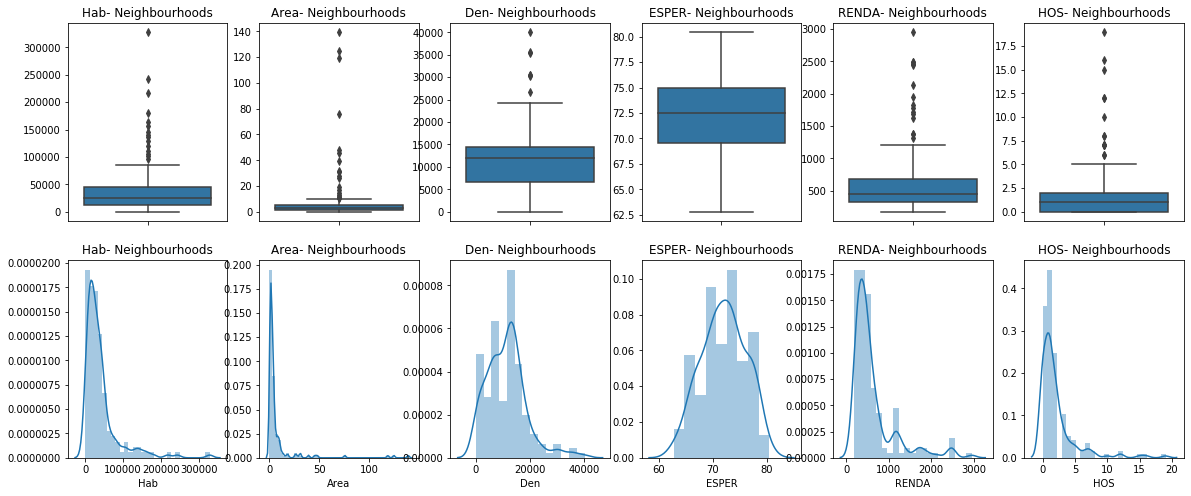

In [15]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,8))

for i in range(6):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y = num_list[i] , data=result)
    plt.title(num_list[i] + '- Neighbourhoods')
    plt.ylabel('')

    plt.subplot(2, 6, i + 7)
    sns.distplot(result[num_list[i]])
    plt.title(num_list[i] + '- Neighbourhoods')
    plt.ylabel('')


**Analyse with Range Bins**

In [16]:
dfc = result.copy()
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
binsa = [[0,50000,100000,150000,200000,250000,350000],[0,5,10,25,50,100,150],[0,10000,20000,30000,41000],[60,65,70,75,80,85],[0,500,1000,1500,2000,2500,3000],[0,3,5,8,10,20]]
labelsa = [['<50k','<100k','<150K','<200k','<250k','>250k'],['<5','<10','<25','<50','<100','>100'],['<10k','<20k','<30K','>30k'],['<65','<70','<75','<80','>80'],['<0.5K','<1k','<1.5K','<2K','<2.5K','>2.5K'],['<3','<5','<8','<10','>10']]

for i in range(6):
    dfc[num_list[i]] = pd.cut(dfc[num_list[i]], bins=binsa[i], labels=labelsa[i])


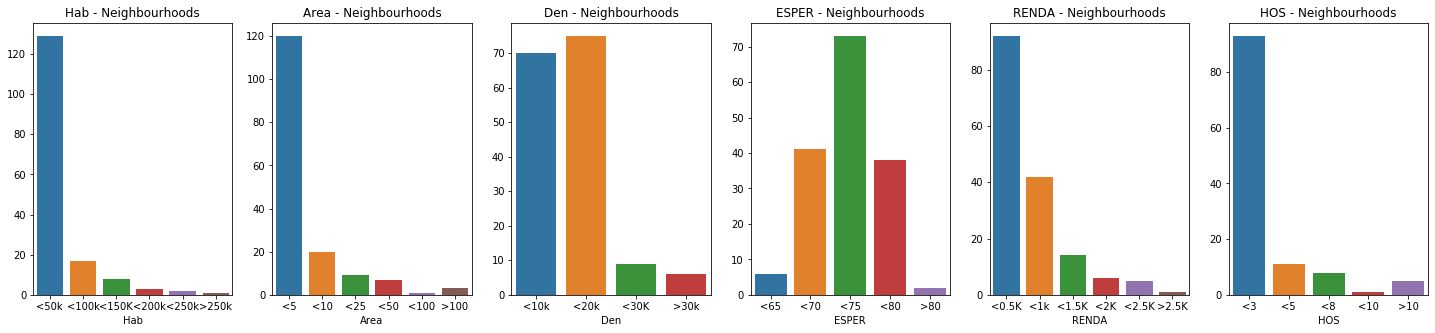

In [17]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(25,5))

for i in range(6):
    plt.subplot(1, 6, i+1)
    sns.countplot(x = num_list[i] , data=dfc)
    plt.title(num_list[i] + ' - Neighbourhoods')
    plt.ylabel('')

### Analyse each Region of Rio de Janeiro

There are four regions in Rio de Janeiro to analyse :
<center><ul>
  <li>Central = Central Region</li>
  <li>Sul =  South Region</li>
  <li>Oeste = East Region</li>
  <li>Norte = North Region</li>
</ul></center>  

![title](images/Regions2.png)

#### Distribution of neighbourhoods by Region

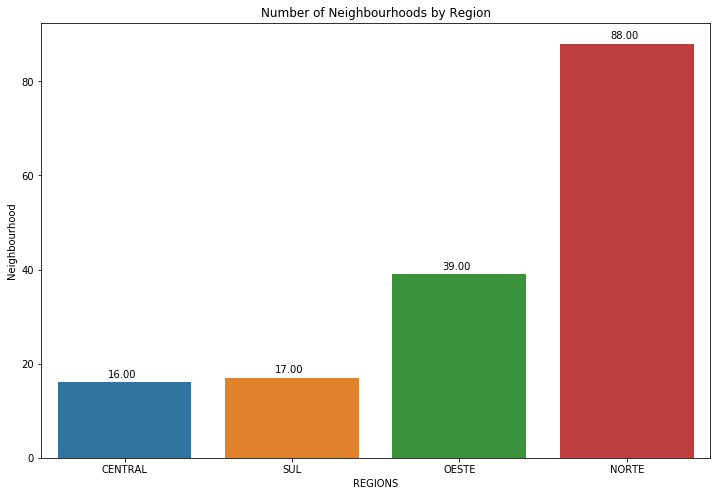

In [18]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ZONA", data=result)
plt.title('Number of Neighbourhoods by Region')
plt.xlabel('REGIONS')
plt.ylabel('Neighbourhood')

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

#### Numeric Values Distribution by Region

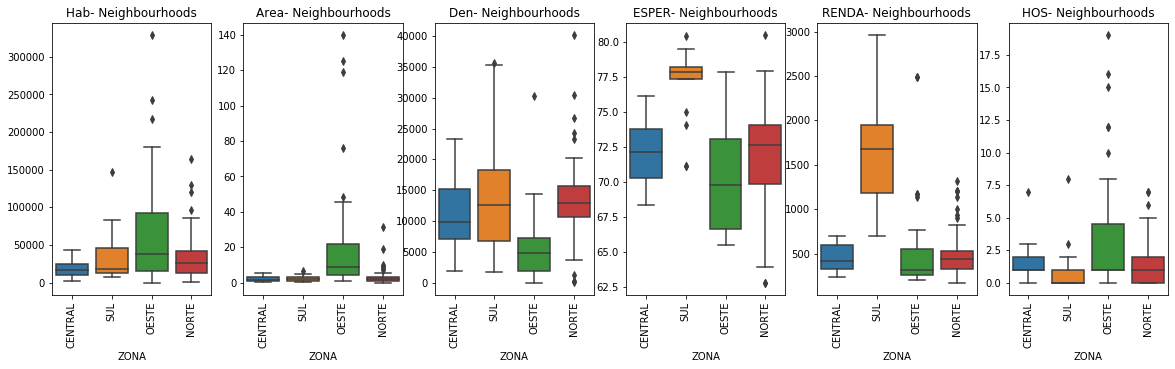

In [19]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,5))

for i in range(6):
    plt.subplot(1, 6, i + 1)
    ax = sns.boxplot(x = 'ZONA', y=num_list[i], data=result)
    plt.title(num_list[i] + '- Neighbourhoods')
    plt.ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

#### IDH values by Region

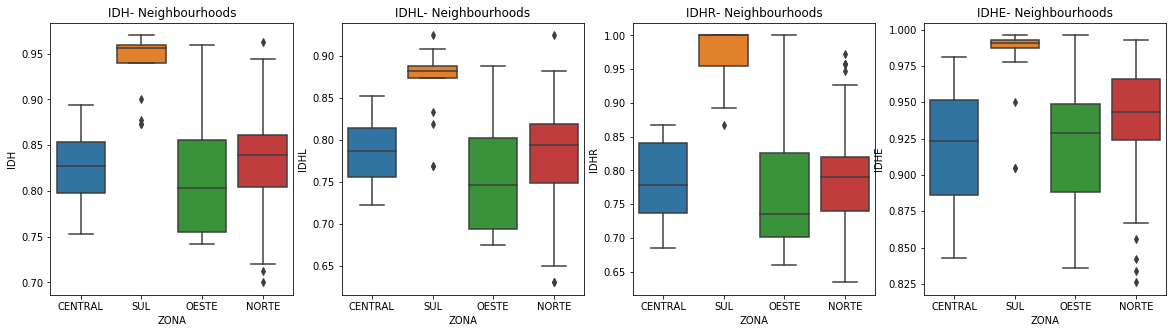

In [20]:
idh_list = ['IDH','IDHL','IDHR','IDHE']
plt.figure(figsize=(20,5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x = 'ZONA', y=idh_list[i], data=result)
    plt.title(idh_list[i]+'- Neighbourhoods')

plt.show()

#### Analyse each Region separately 

In [21]:
centro = result[result.ZONA == 'CENTRAL']
sul = result[result.ZONA == 'SUL']
oeste = result[result.ZONA == 'OESTE']
norte = result[result.ZONA == 'NORTE']

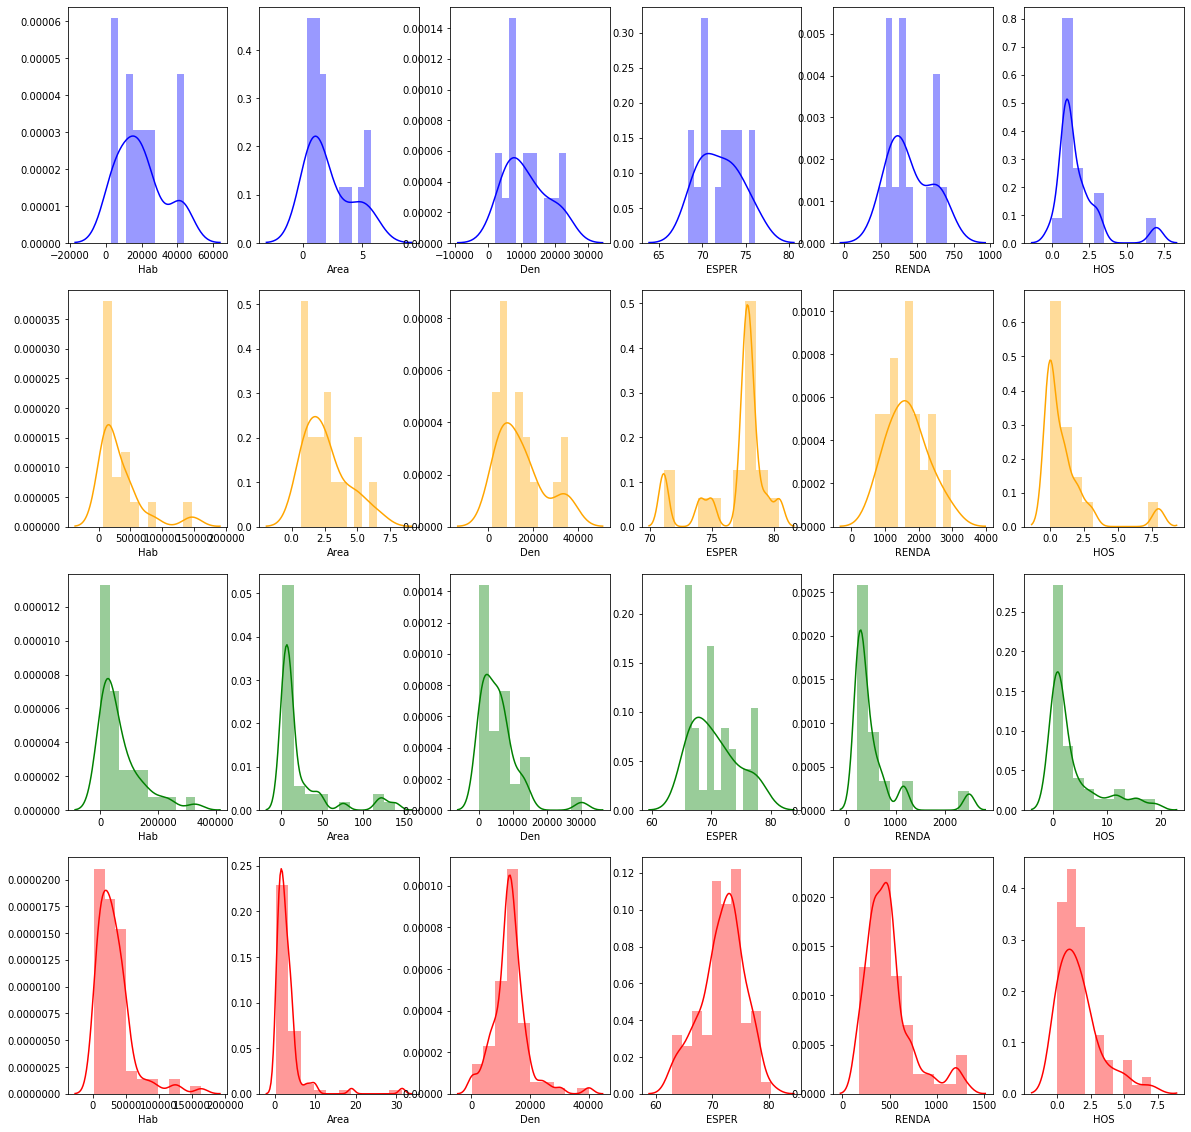

In [22]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,20))

for i in range(6):
    plt.subplot(4, 6, i + 1)
    sns.distplot(centro[num_list[i]], bins=10 , color='blue')
    plt.ylabel('')

    plt.subplot(4, 6, i + 7)
    sns.distplot(sul[num_list[i]], bins=10 , color = 'orange')
    plt.ylabel('')
    
    plt.subplot(4, 6, i + 13)
    sns.distplot(oeste[num_list[i]], bins=10, color = 'green')
    plt.ylabel('')
    
    plt.subplot(4, 6, i + 19)
    sns.distplot(norte[num_list[i]], bins=10, color = 'red')
    plt.ylabel('')


In [23]:
centrob = dfc[dfc.ZONA == 'CENTRAL']
sulb = dfc[dfc.ZONA == 'SUL']
oesteb = dfc[dfc.ZONA == 'OESTE']
norteb = dfc[dfc.ZONA == 'NORTE']

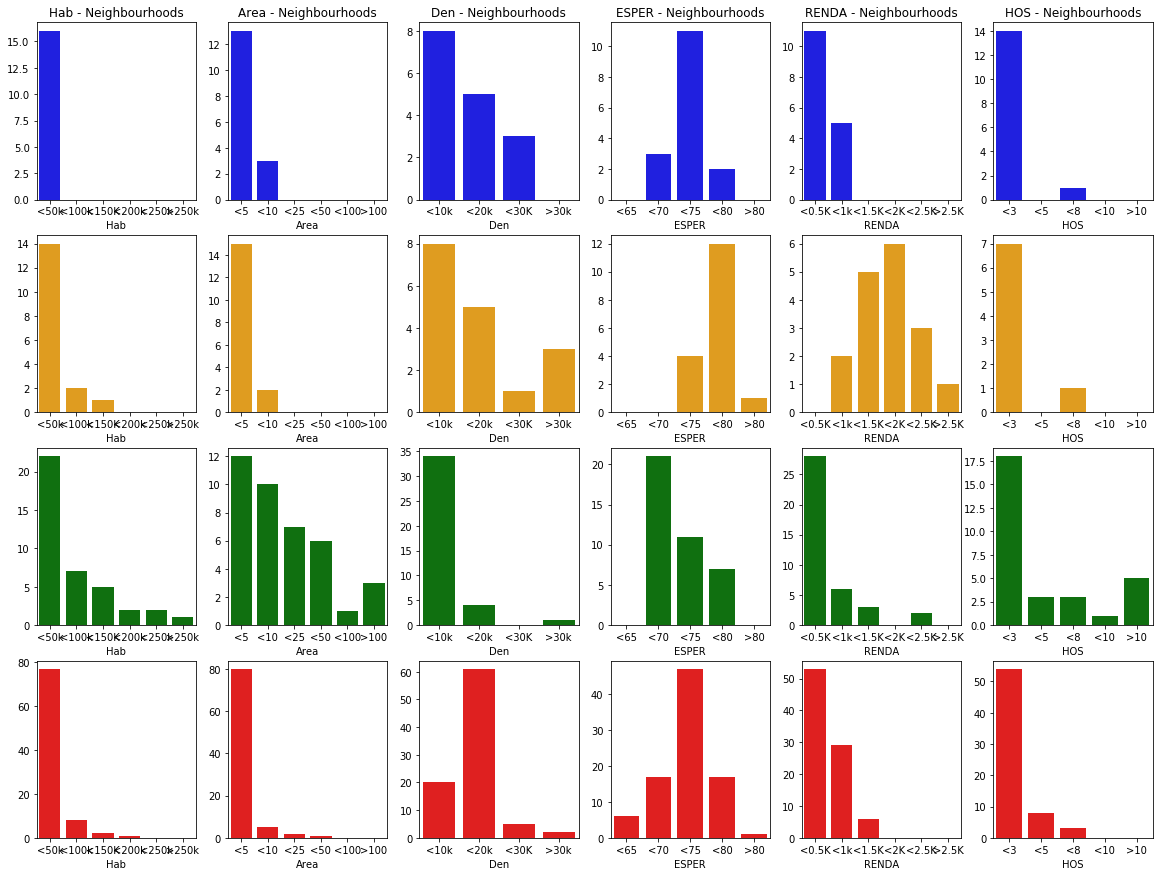

In [24]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,15))

for i in range(6):
    plt.subplot(4, 6, i + 1)
    sns.countplot(x = num_list[i] , data=centrob , color='blue')
    plt.title(num_list[i] + ' - Neighbourhoods')
    plt.ylabel('')

    plt.subplot(4, 6, i + 7)
    sns.countplot(x = num_list[i] , data=sulb , color = 'orange')
    plt.ylabel('')
    
    plt.subplot(4, 6, i + 13)
    sns.countplot(x = num_list[i] , data=oesteb , color = 'green')
    plt.ylabel('')
    
    plt.subplot(4, 6, i + 19)
    sns.countplot(x = num_list[i] , data=norteb, color = 'red')
    plt.ylabel('')


##### Central Region

In [25]:
centro[['Hab','Area','Den','ESPER','RENDA', 'IDHL', 'IDHE', 'IDHR', 'IDH','HOS']].describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,19219.812500,2.183450,11429.913714,72.013125,446.945625,0.783688,0.918562,0.783312,0.828438,1.750000
std,13407.540302,1.893096,6578.334658,2.430815,145.085972,0.040533,0.042078,0.053788,0.040199,1.612452
min,2749.000000,0.363800,1970.452014,68.340000,236.590000,0.722000,0.843000,0.685000,0.753000,0.000000
25%,10614.000000,0.900625,7005.829575,70.280000,323.765000,0.755000,0.886000,0.737500,0.798000,1.000000
50%,17512.000000,1.398800,9857.046230,72.160000,412.390000,0.786000,0.923000,0.778000,0.827000,1.000000
75%,25438.250000,3.533275,15216.349292,73.797500,601.035000,0.813500,0.951250,0.841000,0.853500,2.000000
max,43764.000000,5.723100,23273.401297,76.120000,701.190000,0.852000,0.981000,0.867000,0.894000,7.000000


##### South Region

In [26]:
sul[['Hab','Area','Den','ESPER','RENDA', 'IDHL', 'IDHE', 'IDHR', 'IDH','HOS']].describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33539.176471,2.578224,14512.869715,76.965882,1665.047647,0.866353,0.978529,0.974353,0.939412,1.117647
std,35564.457453,1.670527,10766.018046,2.629463,605.632417,0.043796,0.029676,0.040916,0.034351,1.996320
min,7061.000000,0.681000,1692.198625,71.120000,701.190000,0.769000,0.905000,0.867000,0.873000,0.000000
25%,12797.000000,1.140100,6774.306094,77.370000,1183.280000,0.873000,0.987000,0.954000,0.940000,0.000000
50%,18009.000000,2.319000,12598.387862,77.840000,1679.220000,0.881000,0.991000,1.000000,0.956000,0.000000
75%,45554.000000,3.084900,18269.099659,78.250000,1952.770000,0.888000,0.993000,1.000000,0.959000,1.000000
max,146392.000000,6.488600,35705.365854,80.450000,2955.290000,0.924000,0.996000,1.000000,0.970000,8.000000


##### East Region

In [27]:
oeste[['Hab','Area','Den','ESPER','RENDA', 'IDHL', 'IDHE', 'IDHR', 'IDH','HOS']].describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,67817.307692,22.588362,5626.447607,70.504615,536.825641,0.758615,0.917821,0.774051,0.816795,3.692308
std,74392.786353,34.547458,5620.391522,3.934957,528.648643,0.066053,0.047102,0.099362,0.066486,5.000810
min,167.000000,1.205800,17.398008,65.520000,203.430000,0.675000,0.836000,0.660000,0.742000,0.000000
25%,15877.000000,4.436350,1813.002654,66.660000,260.440000,0.694000,0.888500,0.701000,0.755000,1.000000
50%,37856.000000,8.859900,4868.216120,69.780000,318.030000,0.746000,0.929000,0.735000,0.803000,1.000000
75%,92183.000000,21.645050,7270.199213,73.080000,550.820000,0.801500,0.949000,0.826000,0.856000,4.500000
max,328370.000000,139.501200,30282.799801,77.840000,2488.470000,0.888000,0.996000,1.000000,0.959000,19.000000


##### North Region

In [28]:
norte[['Hab','Area','Den','ESPER','RENDA', 'IDHL', 'IDHE', 'IDHR', 'IDH','HOS']].describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,32066.590909,3.042592,13194.988875,71.795909,490.145114,0.779886,0.939466,0.788136,0.835670,1.636364
std,27670.139227,4.004414,5890.368611,3.838099,249.571033,0.063957,0.038225,0.078825,0.057234,1.634272
min,1556.000000,0.161100,164.511593,62.810000,174.120000,0.630000,0.826000,0.634000,0.700000,0.000000
25%,12617.750000,1.179175,10710.673234,69.880000,327.960000,0.748000,0.924000,0.739750,0.804000,0.000000
50%,25838.500000,2.157450,12920.607707,72.660000,443.055000,0.794000,0.943500,0.790000,0.839000,1.000000
75%,42232.750000,3.564100,15608.533625,74.060000,529.535000,0.818000,0.966000,0.819750,0.861000,2.000000
max,163805.000000,31.495700,40087.933044,80.470000,1316.860000,0.924000,0.993000,0.972000,0.963000,7.000000


#### Comparing Regions Table

In [29]:
soma = result.groupby(by = 'ZONA').sum()
avgs = result.groupby(by = 'ZONA').mean()

In [30]:
soma = soma.drop(['LAT','LON','Den','ESPER','RENDA','IDHL','IDHE','IDHR','IDH'], axis=1)
avgs = avgs.drop(['LAT','LON'], axis=1)

In [31]:
soma = soma.rename(columns={'Hab':'Total Hab', 'HOS' :'Total Hos', 'Area' : 'Total Area'})
soma = soma.reset_index()
avgs = avgs.rename(columns={'Hab':'Avg Hab','Area' : 'Avg Area','Den' : 'Avg Den','ESPER': 'Avg Esper','RENDA' : 'Avg Renda','IDHL' : 'Avg IDHL','IDHE' : 'Avg IDHE','IDHR' : 'Avg IDHR','IDH' : 'Avg IDH','HOS' :'Avg Hos'})
avgs = avgs.reset_index()

In [32]:
Regions = soma.merge(avgs , on= 'ZONA')
Regions = Regions.set_index('ZONA')

In [33]:
Regions

,Total Hab,Total Area,Total Hos,Avg Hab,Avg Area,Avg Den,Avg Esper,Avg Renda,Avg IDHL,Avg IDHE,Avg IDHR,Avg IDH,Avg Hos
ZONA,,,,,,,,,,,,,
CENTRAL,307517.0,34.9352,28.0,19219.812500,2.183450,11429.913714,72.013125,446.945625,0.783688,0.918562,0.783312,0.828438,1.750000
NORTE,2821860.0,267.7481,144.0,32066.590909,3.042592,13194.988875,71.795909,490.145114,0.779886,0.939466,0.788136,0.835670,1.636364
OESTE,2644875.0,880.9461,144.0,67817.307692,22.588362,5626.447607,70.504615,536.825641,0.758615,0.917821,0.774051,0.816795,3.692308
SUL,570166.0,43.8298,19.0,33539.176471,2.578224,14512.869715,76.965882,1665.047647,0.866353,0.978529,0.974353,0.939412,1.117647


### Analyse each Subprefecture in Rio de Janeiro

There are nine subprefectures in Rio de Janeiro:
<center><ul>
  <li>Centro histórico e Zona Portuaria</li>
  <li>Zona Sul</li>
  <li>Barra da Tijuca e baixada de Jacarepaguá</li>
  <li>Grande Bangu</li>
  <li>Zona Oeste</li>
  <li>Grande Tijuca</li>
  <li>Grande Méier</li>
  <li>Ilha do governador</li>
  <li>Zona norte</li>
</ul></center>

![title](images/Regions3.png)

#### Distributions of neighbourhoods by Subprefectures

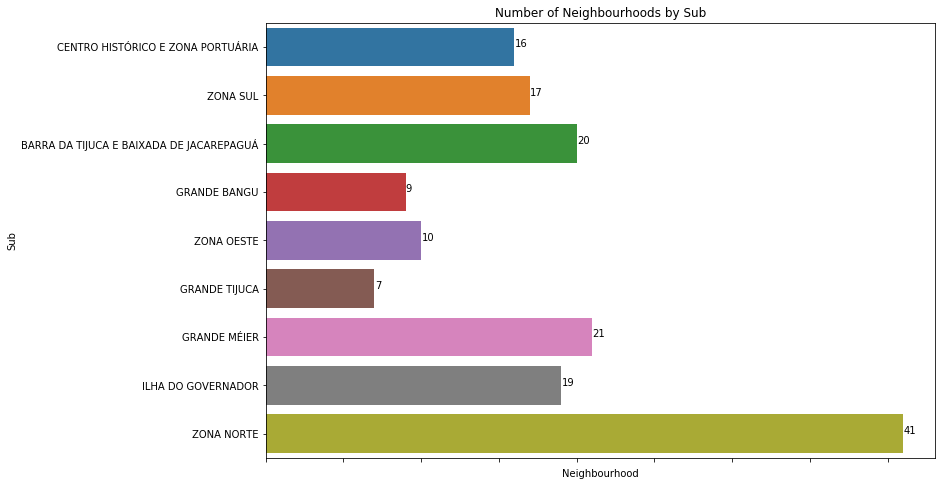

In [34]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="SUB", data=result, orient='h')
plt.title('Number of Neighbourhoods by Sub')
plt.xlabel('Neighbourhood')
plt.ylabel('Sub')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#for p in ax.patches:
#    ax.annotate('{:.2f}'.format(p.get_width()), (p.get_x()+0.3, p.get_width()))
    
for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x= p.get_x()+width+0.02
    y= p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.show()

#### Numeric Values Distribution by Subprefectures

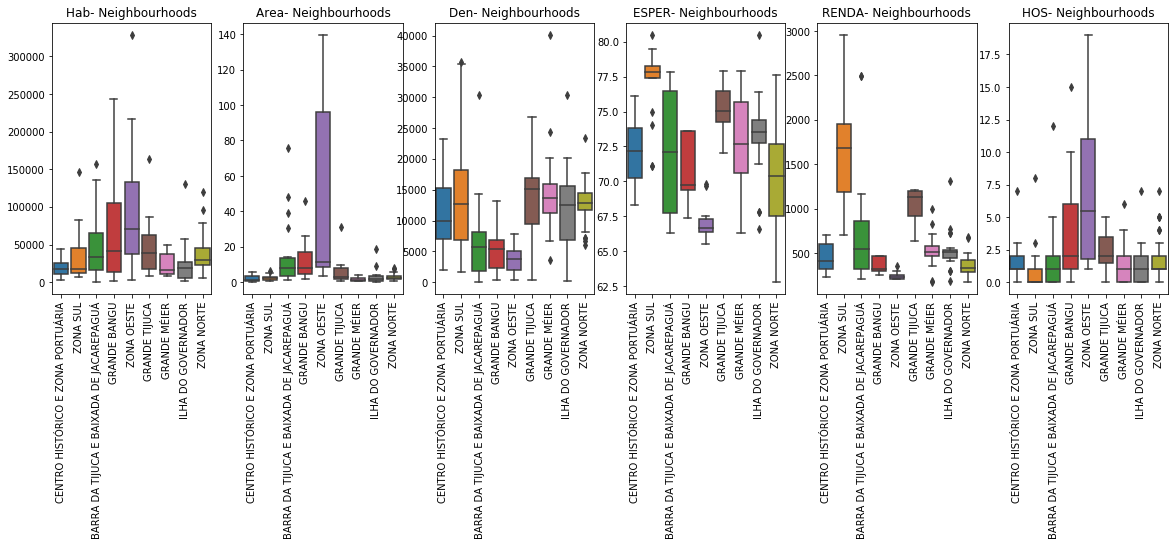

In [35]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,5))

for i in range(6):
    plt.subplot(1, 6, i + 1)
    ax = sns.boxplot(x = 'SUB', y=num_list[i], data=result)
    plt.title(num_list[i] + '- Neighbourhoods')
    plt.ylabel('')
    plt.xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

#### IDH Values Distribution by Subprefecture

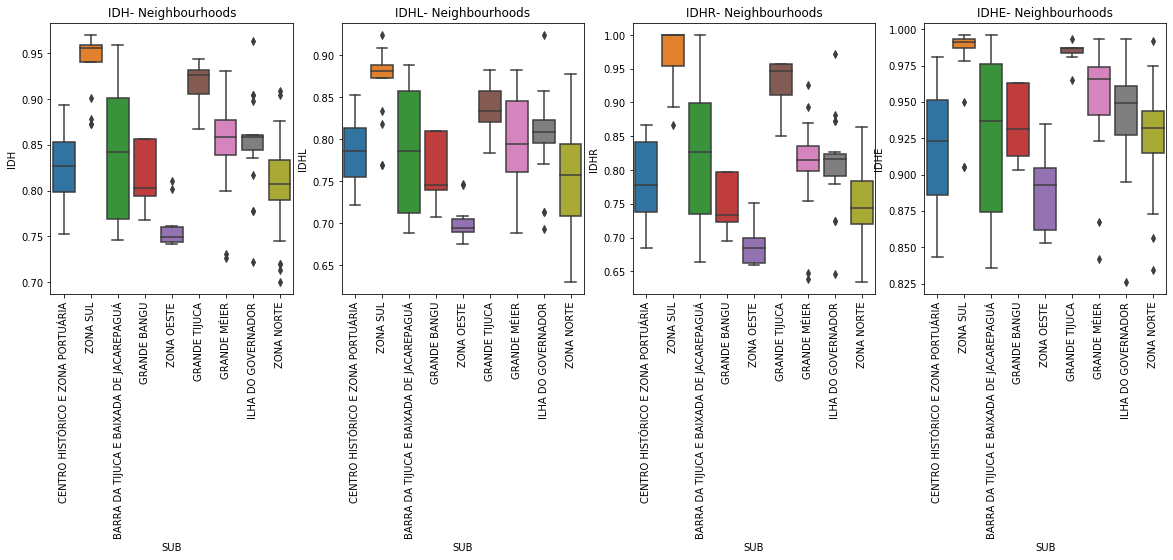

In [36]:
idh_list = ['IDH','IDHL','IDHR','IDHE']
plt.figure(figsize=(20,5))

for i in range(4):
    plt.subplot(1, 4, i+1)
    ax = sns.boxplot(x = 'SUB', y=idh_list[i], data=result)
    plt.title(idh_list[i]+'- Neighbourhoods')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

#### Analyse each Subprefecture

In [37]:
centro_historico = dfc[dfc.SUB == 'CENTRO HISTÓRICO E ZONA PORTUÁRIA']
zona_sul = dfc[dfc.SUB == 'ZONA SUL']
barra = dfc[dfc.SUB == 'BARRA DA TIJUCA E BAIXADA DE JACAREPAGUÁ']
bangu = dfc[dfc.SUB == 'GRANDE BANGU']
zona_oeste = dfc[dfc.SUB == 'ZONA OESTE']
tijuca = dfc[dfc.SUB == 'GRANDE TIJUCA']
meier = dfc[dfc.SUB == 'GRANDE MÉIER']
ilha = dfc[dfc.SUB == 'ILHA DO GOVERNADOR']
zona_norte = dfc[dfc.SUB == 'ZONA NORTE']

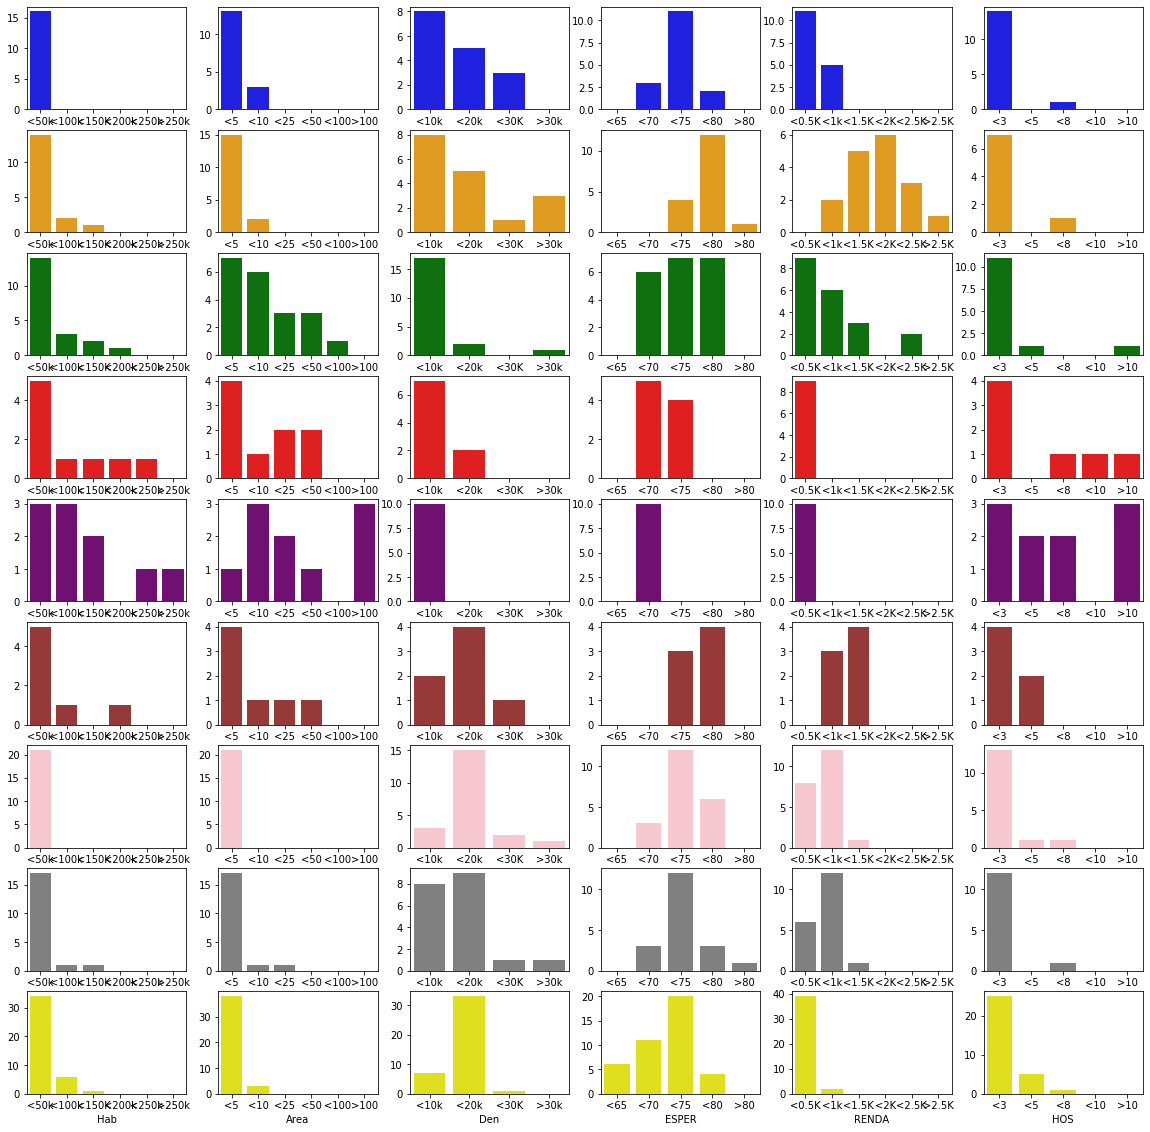

In [38]:
num_list = ['Hab','Area','Den','ESPER','RENDA','HOS']
plt.figure(figsize=(20,20))

for i in range(6):
    plt.subplot(9, 6, i + 1)
    sns.countplot(x = num_list[i] , data=centro_historico , color='blue')
    plt.ylabel('')

    plt.subplot(9, 6, i + 7)
    sns.countplot(x = num_list[i] , data=zona_sul , color='orange')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 13)
    sns.countplot(x = num_list[i] , data=barra , color='green')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 19)
    sns.countplot(x = num_list[i] , data=bangu , color='red')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 25)
    sns.countplot(x = num_list[i] , data=zona_oeste , color='purple')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 31)
    sns.countplot(x = num_list[i] , data=tijuca , color='brown')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 37)
    sns.countplot(x = num_list[i] , data=meier , color='pink')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 43)
    sns.countplot(x = num_list[i] , data=ilha , color='gray')
    plt.ylabel('')
    
    plt.subplot(9, 6, i + 49)
    sns.countplot(x = num_list[i] , data=zona_norte , color='yellow')
    plt.ylabel('')

#### Analyse each Subprefecture separately 

##### Centro historico e zona portuaria

In [45]:
c = result[result.SUB == 'CENTRO HISTÓRICO E ZONA PORTUÁRIA']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,19219.812500,2.183450,11429.913714,72.013125,446.945625,0.783688,0.918562,0.783312,0.828438,1.750000
std,13407.540302,1.893096,6578.334658,2.430815,145.085972,0.040533,0.042078,0.053788,0.040199,1.612452
min,2749.000000,0.363800,1970.452014,68.340000,236.590000,0.722000,0.843000,0.685000,0.753000,0.000000
25%,10614.000000,0.900625,7005.829575,70.280000,323.765000,0.755000,0.886000,0.737500,0.798000,1.000000
50%,17512.000000,1.398800,9857.046230,72.160000,412.390000,0.786000,0.923000,0.778000,0.827000,1.000000
75%,25438.250000,3.533275,15216.349292,73.797500,601.035000,0.813500,0.951250,0.841000,0.853500,2.000000
max,43764.000000,5.723100,23273.401297,76.120000,701.190000,0.852000,0.981000,0.867000,0.894000,7.000000


##### Zona sul

In [46]:
c = result[result.SUB == 'ZONA SUL']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33539.176471,2.578224,14512.869715,76.965882,1665.047647,0.866353,0.978529,0.974353,0.939412,1.117647
std,35564.457453,1.670527,10766.018046,2.629463,605.632417,0.043796,0.029676,0.040916,0.034351,1.996320
min,7061.000000,0.681000,1692.198625,71.120000,701.190000,0.769000,0.905000,0.867000,0.873000,0.000000
25%,12797.000000,1.140100,6774.306094,77.370000,1183.280000,0.873000,0.987000,0.954000,0.940000,0.000000
50%,18009.000000,2.319000,12598.387862,77.840000,1679.220000,0.881000,0.991000,1.000000,0.956000,0.000000
75%,45554.000000,3.084900,18269.099659,78.250000,1952.770000,0.888000,0.993000,1.000000,0.959000,1.000000
max,146392.000000,6.488600,35705.365854,80.450000,2955.290000,0.924000,0.996000,1.000000,0.970000,8.000000


##### Barra da tijuca e baixada de jacarepagua

In [47]:
c = result[result.SUB == 'BARRA DA TIJUCA E BAIXADA DE JACAREPAGUÁ']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000
mean,46121.500000,14.826740,6444.521422,72.115000,767.658500,0.785650,0.924300,0.830000,0.846600,1.7000
std,43792.103367,19.296491,7008.861244,4.357421,660.814895,0.073235,0.056345,0.104861,0.073757,2.7549
min,167.000000,1.205800,17.398008,66.300000,207.560000,0.688000,0.836000,0.663000,0.746000,0.0000
25%,16796.000000,3.460200,1830.478278,67.720000,318.352500,0.712000,0.874500,0.734750,0.768750,0.0000
50%,33494.000000,7.974600,5768.389474,72.125000,550.820000,0.785500,0.937000,0.826000,0.842000,1.0000
75%,65738.000000,13.514525,8134.499383,76.445000,859.927500,0.857000,0.975750,0.899500,0.901000,2.0000
max,157326.000000,75.796400,30282.799801,77.840000,2488.470000,0.888000,0.996000,1.000000,0.959000,12.0000


#####  Grande bangu

In [48]:
c = result[result.SUB == 'GRANDE BANGU']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,76030.000000,13.644544,5876.002264,70.660000,348.711111,0.761111,0.934111,0.745333,0.813222,4.111111
std,84702.777826,14.289154,4498.636962,2.328438,88.475073,0.038793,0.024862,0.041373,0.034139,5.230785
min,1365.000000,1.975900,419.702979,67.390000,251.090000,0.707000,0.903000,0.695000,0.768000,0.000000
25%,13184.000000,4.640500,2336.386165,69.360000,296.550000,0.739000,0.913000,0.723000,0.794000,1.000000
50%,41458.000000,8.319600,5320.021882,69.780000,316.410000,0.746000,0.931000,0.734000,0.803000,2.000000
75%,105515.000000,17.235900,6913.395921,73.590000,462.130000,0.810000,0.963000,0.797000,0.856000,6.000000
max,243125.000000,45.700000,13199.884911,73.590000,462.130000,0.810000,0.963000,0.797000,0.856000,15.000000


##### Zona oeste

In [49]:
c = result[result.SUB == 'ZONA OESTE']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,10.0000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,103817.5000,46.161040,3765.700785,67.14400,244.463000,0.70230,0.890200,0.688000,0.760400,7.300000
std,101919.2795,56.925245,2506.542400,1.46204,48.813514,0.02464,0.030154,0.030692,0.024959,6.464433
min,3577.0000,3.636900,378.839229,65.52000,203.430000,0.67500,0.853000,0.660000,0.742000,1.000000
25%,37093.7500,8.576425,1956.201800,66.39000,206.575000,0.68950,0.861500,0.662250,0.744000,1.750000
50%,70828.0000,11.441300,3754.818429,66.66000,234.370000,0.69400,0.892500,0.684000,0.749000,5.500000
75%,132907.5000,96.104500,5061.070734,67.29750,257.192500,0.70525,0.904250,0.699000,0.760500,11.000000
max,328370.0000,139.501200,7800.407823,69.80000,351.110000,0.74700,0.935000,0.751000,0.810000,19.000000


##### Grande tjuca

In [50]:
c = result[result.SUB == 'GRANDE TIJUCA']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,53017.142857,7.880857,13519.213741,75.190000,1031.358571,0.836571,0.983714,0.927286,0.915857,2.428571
std,55378.529514,10.879941,8397.650667,2.135353,216.982498,0.035692,0.008958,0.039593,0.026277,1.718249
min,8662.000000,0.719900,296.643669,72.050000,640.310000,0.784000,0.965000,0.851000,0.867000,0.000000
25%,17299.500000,1.964300,9385.195609,74.225000,914.160000,0.820500,0.983500,0.911000,0.905000,1.500000
50%,38671.000000,3.217100,15147.843819,75.040000,1134.930000,0.834000,0.987000,0.947000,0.926000,2.000000
75%,62691.500000,7.902350,16840.936153,76.440000,1204.610000,0.857500,0.987000,0.957000,0.932000,3.500000
max,163805.000000,31.495700,26737.745174,77.910000,1206.730000,0.882000,0.993000,0.957000,0.944000,5.000000


##### Grande meier

In [51]:
c = result[result.SUB == 'GRANDE MÉIER']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,24359.380952,1.733119,14848.722553,72.777619,530.123810,0.796190,0.952381,0.808619,0.852381,1.571429
std,15132.070253,1.020196,7332.863656,3.259136,185.986467,0.054343,0.038516,0.067522,0.051399,1.535299
min,7972.000000,0.616300,3608.935784,66.300000,177.980000,0.688000,0.842000,0.638000,0.726000,0.000000
25%,10895.000000,0.928100,11159.476216,70.640000,467.230000,0.761000,0.941000,0.799000,0.839000,0.000000
50%,15734.000000,1.311600,13633.229178,72.660000,513.620000,0.794000,0.966000,0.815000,0.858000,1.000000
75%,37839.000000,2.470900,15945.251059,75.700000,583.350000,0.845000,0.974000,0.836000,0.877000,2.000000
max,49828.000000,3.920400,40087.933044,77.910000,1000.160000,0.882000,0.993000,0.926000,0.931000,6.000000


##### Ilha do governador

In [53]:
c = result[result.SUB == 'ILHA DO GOVERNADOR']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,24034.578947,3.114405,12096.566088,73.230526,544.809474,0.803737,0.940421,0.811421,0.851842,1.315789
std,29401.154377,4.407198,7367.606651,3.240277,236.017424,0.053941,0.039442,0.067880,0.052521,1.634783
min,1556.000000,0.161100,164.511593,66.580000,187.250000,0.693000,0.826000,0.646000,0.722000,0.000000
25%,6212.000000,0.733000,6914.896565,72.755000,448.320000,0.795500,0.927500,0.791500,0.844500,0.000000
50%,18711.000000,1.672500,12513.966480,73.530000,517.830000,0.809000,0.949000,0.816000,0.858000,1.000000
75%,27178.500000,3.447850,15632.340025,74.380000,540.095000,0.823000,0.961000,0.823000,0.861000,2.000000
max,129770.000000,18.957400,30399.643928,80.470000,1316.860000,0.924000,0.993000,0.972000,0.963000,7.000000


##### Zona norte

In [52]:
c = result[result.SUB == 'ZONA NORTE']
c = c.drop(['LAT','LON'],1)
c.describe()

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,36159.414634,2.853973,12801.624281,70.048780,351.933659,0.750805,0.924854,0.743098,0.805927,1.682927
std,23365.546151,1.680558,3374.701861,3.833005,113.792527,0.063883,0.032783,0.054594,0.046435,1.679866
min,6113.000000,0.515200,6065.519742,62.810000,174.120000,0.630000,0.834000,0.634000,0.700000,0.000000
25%,22676.000000,1.723900,11720.078822,67.510000,290.490000,0.709000,0.915000,0.720000,0.790000,1.000000
50%,29310.000000,2.261100,12907.245223,70.410000,336.570000,0.757000,0.932000,0.744000,0.807000,1.000000
75%,45698.000000,3.820000,14387.714794,72.660000,424.670000,0.794000,0.944000,0.783000,0.833000,2.000000
max,120000.000000,8.311400,23352.021345,77.640000,684.940000,0.877000,0.992000,0.863000,0.909000,7.000000


#### Comparing Subprefectures Table

In [57]:
avg_sub = result.groupby(by = 'SUB').mean()

In [59]:
avg_sub = avg_sub.drop(['LAT','LON'],1)

In [60]:
avg_sub

,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
SUB,,,,,,,,,,
BARRA DA TIJUCA E BAIXADA DE JACAREPAGUÁ,46121.500000,14.826740,6444.521422,72.115000,767.658500,0.785650,0.924300,0.830000,0.846600,1.700000
CENTRO HISTÓRICO E ZONA PORTUÁRIA,19219.812500,2.183450,11429.913714,72.013125,446.945625,0.783688,0.918562,0.783312,0.828438,1.750000
GRANDE BANGU,76030.000000,13.644544,5876.002264,70.660000,348.711111,0.761111,0.934111,0.745333,0.813222,4.111111
GRANDE MÉIER,24359.380952,1.733119,14848.722553,72.777619,530.123810,0.796190,0.952381,0.808619,0.852381,1.571429
GRANDE TIJUCA,53017.142857,7.880857,13519.213741,75.190000,1031.358571,0.836571,0.983714,0.927286,0.915857,2.428571
ILHA DO GOVERNADOR,24034.578947,3.114405,12096.566088,73.230526,544.809474,0.803737,0.940421,0.811421,0.851842,1.315789
ZONA NORTE,36159.414634,2.853973,12801.624281,70.048780,351.933659,0.750805,0.924854,0.743098,0.805927,1.682927
ZONA OESTE,103817.500000,46.161040,3765.700785,67.144000,244.463000,0.702300,0.890200,0.688000,0.760400,7.300000
ZONA SUL,33539.176471,2.578224,14512.869715,76.965882,1665.047647,0.866353,0.978529,0.974353,0.939412,1.117647


### Analysing Top neighbourhoods in Rio de Janeiro

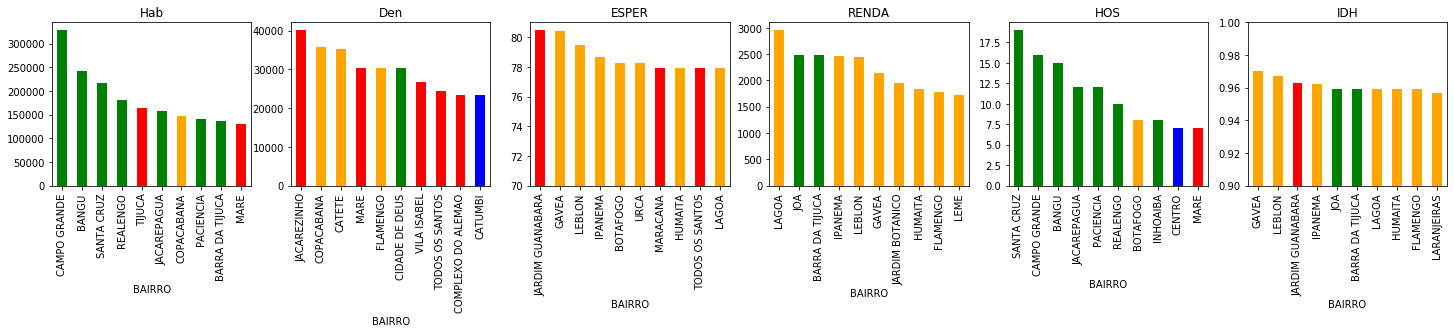

In [61]:
num_list = ['Hab','Den','ESPER','RENDA','HOS','IDH']
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize= (25,3))
colorsi = [['g','g','g','g','r','g','orange','g','g','r'],['r','orange','orange','r','orange','g','r','r','r','b'],['r','orange','orange','orange','orange','orange','r','orange','r','orange'],['orange','g','g','orange','orange','orange','orange','orange','orange','orange'],['g','g','g','g','g','g','orange','g','b','r'],['orange','orange','r','orange','g','g','orange','orange','orange','orange']]

for i in range(6):
    result.sort_values(num_list[i], ascending=False).head(10).plot('BAIRRO',num_list[i], ax = axes[i], kind = 'bar', color = colorsi[i],legend=False)
    axes[i].set_title(num_list[i])
    if i == 2:
        axes[i].set_ylim([70,81])
    elif i == 5:
        axes[i].set_ylim([0.9,1])


## Using Foursquare API

We are going to use Foursquare Api to find the number of pharmacies inside each neighbourhood in Rio de Janeiro.

### Prepare Data for API

**Since we are working with more than 150 neighbourhoods. We are going to slice the dataframe to analyse only the important neighbourhoods that is neighbourhoods that belong in the Top 15 of any of the important features**

In [62]:
# UNIQUE VALUES IN LIST
def unique (x):
    new = []
    for i in x:
        for t in i: 
            if not(t in new):
                new.append(t)
    return new

In [63]:
# TOP 15 Neihgbourhoods in most important features
num_list = ['Den','ESPER','RENDA','HOS','IDH']
important = []
for i in num_list:
    important.append(list(result.nlargest(15,i, keep='all').BAIRRO.values))

In [64]:
# APPLY FUNCTION
important_n = unique(important)

In [65]:
# DATAFRAME
important_df = result[result.BAIRRO.isin(important_n)]
important_df = important_df.reset_index()
important_df = important_df.drop(['index'], axis=1)

In [66]:
important_df.shape

(45, 15)

In [67]:
important_df.head(5)

,BAIRRO,SUB,ZONA,LAT,LON,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS
0,CATUMBI,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.917590,-43.197040,12556.0,0.5395,23273.401297,69.60,324.83,0.743,0.923,0.738,0.802,1.0
1,CENTRO,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.908076,-43.182324,41142.0,5.7231,7188.761336,76.12,633.36,0.852,0.981,0.850,0.894,7.0
2,MANGUEIRA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.905917,-43.235340,17835.0,0.7981,22346.823706,68.34,357.43,0.722,0.923,0.754,0.800,2.0
3,VASCO DA GAMA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.893230,-43.226700,20126.0,1.0031,20063.802213,72.27,412.39,0.788,0.933,0.778,0.833,1.0
4,BOTAFOGO,ZONA SUL,SUL,-22.951380,-43.184130,82890.0,4.7990,17272.348406,78.25,1376.47,0.888,0.990,0.979,0.952,8.0


###  Foursquare API

In [68]:
CLIENT_ID = '2RMODDVIDVORIKPXFPI1MN10AQZUWLRKUBOYKB5XSRTYYEU0' # your Foursquare ID
CLIENT_SECRET = 'BLJDR5PI2XFV0YXC1VNCFTW13FLWN2QPVBHZQHZA0RSE2JHN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2RMODDVIDVORIKPXFPI1MN10AQZUWLRKUBOYKB5XSRTYYEU0
CLIENT_SECRET:BLJDR5PI2XFV0YXC1VNCFTW13FLWN2QPVBHZQHZA0RSE2JHN


**Examine First row**

In [69]:
print('Neighbourhood :' , important_df.loc[0, 'BAIRRO'])

neighborhood_latitude = important_df.loc[0, 'LAT'] # neighborhood latitude value
neighborhood_longitude = important_df.loc[0, 'LON'] # neighborhood longitude value
neighborhood_area = important_df.loc[0, 'Area'] # neighborhood longitude value


neighborhood_name = important_df.loc[0, 'BAIRRO'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}, Area {} KM2.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude,
                                                               neighborhood_area))

Neighbourhood : CATUMBI
Latitude and longitude values of CATUMBI are -22.91758999999996, -43.19703999999996, Area 0.5395 KM2.


**Explore Venues**

In [70]:
def getNearbyVenues(names, latitudes, longitudes, area):
   
    venues_list=[]
    search_query = '4bf58dd8d48988d10f951735'
    for name, lat, lng, a in zip(names, latitudes, longitudes, area):
        
        if a > 1:
            radius = 1000
        else:
            radius = 500
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            lat,
            lng,
            VERSION,
            search_query,
            radius,
            LIMIT)
            
            
        # TOTAL PHARMACIES NEAR
        results = len(requests.get(url).json()['response']['venues'])
        
        venues_list.append([name,results])

    return(venues_list)

In [71]:
venues = getNearbyVenues(names=list(important_df['BAIRRO']),
                                   latitudes=list(important_df['LAT']),
                                   longitudes=list(important_df['LON']),
                                   area= list(important_df['Area'])
                                  )

In [72]:
farmacias = pd.DataFrame(venues)
farmacias = farmacias.rename(columns={0:'BAIRRO',1:'PHAR'})

### Merge Foursquare results with analysed data

In [73]:
important_df = important_df.merge(farmacias, on='BAIRRO')

In [74]:
important_df.head()

,BAIRRO,SUB,ZONA,LAT,LON,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
0,CATUMBI,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.917590,-43.197040,12556.0,0.5395,23273.401297,69.60,324.83,0.743,0.923,0.738,0.802,1.0,2
1,CENTRO,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.908076,-43.182324,41142.0,5.7231,7188.761336,76.12,633.36,0.852,0.981,0.850,0.894,7.0,50
2,MANGUEIRA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.905917,-43.235340,17835.0,0.7981,22346.823706,68.34,357.43,0.722,0.923,0.754,0.800,2.0,1
3,VASCO DA GAMA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.893230,-43.226700,20126.0,1.0031,20063.802213,72.27,412.39,0.788,0.933,0.778,0.833,1.0,3
4,BOTAFOGO,ZONA SUL,SUL,-22.951380,-43.184130,82890.0,4.7990,17272.348406,78.25,1376.47,0.888,0.990,0.979,0.952,8.0,50


In [75]:
# NORMALIZE
num_list = ['Den','ESPER','RENDA','HOS','IDH','PHAR']

important_nor = important_df.copy()
important_nor = important_nor.drop(['BAIRRO','SUB','ZONA','LAT','LON','Hab','Area','IDHL','IDHE','IDHR'], 1)

for i in num_list:
    important_nor[i] = important_df[i] / important_df[i].max()

In [76]:
important_nor.head()

,Den,ESPER,RENDA,IDH,HOS,PHAR
0,0.580559,0.864919,0.109915,0.826804,0.052632,0.04
1,0.179325,0.945943,0.214314,0.921649,0.368421,1.00
2,0.557445,0.849261,0.120946,0.824742,0.105263,0.02
3,0.500495,0.898099,0.139543,0.858763,0.052632,0.06
4,0.430862,0.972412,0.465765,0.981443,0.421053,1.00


## Clusterization 

In [77]:
from sklearn.cluster import KMeans

In [78]:
# Kmeans
k = 7

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(important_nor)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 4, 4, 2, 3, 3, 3, 6, 6])

In [79]:
# add clustering labels
important_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [80]:
important_df.head(20)

,Cluster Labels,BAIRRO,SUB,ZONA,LAT,LON,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
0,4,CATUMBI,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.917590,-43.197040,12556.0,0.5395,23273.401297,69.60,324.83,0.743,0.923,0.738,0.802,1.0,2
1,2,CENTRO,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.908076,-43.182324,41142.0,5.7231,7188.761336,76.12,633.36,0.852,0.981,0.850,0.894,7.0,50
2,4,MANGUEIRA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.905917,-43.235340,17835.0,0.7981,22346.823706,68.34,357.43,0.722,0.923,0.754,0.800,2.0,1
3,4,VASCO DA GAMA,CENTRO HISTÓRICO E ZONA PORTUÁRIA,CENTRAL,-22.893230,-43.226700,20126.0,1.0031,20063.802213,72.27,412.39,0.788,0.933,0.778,0.833,1.0,3
4,2,BOTAFOGO,ZONA SUL,SUL,-22.951380,-43.184130,82890.0,4.7990,17272.348406,78.25,1376.47,0.888,0.990,0.979,0.952,8.0,50
5,3,CATETE,ZONA SUL,SUL,-22.930720,-43.179400,24057.0,0.6810,35325.991189,74.99,822.22,0.833,0.978,0.893,0.901,1.0,36
6,3,COPACABANA,ZONA SUL,SUL,-22.975930,-43.189600,146392.0,4.1000,35705.365854,77.78,1623.42,0.880,0.990,1.000,0.956,2.0,50
7,3,FLAMENGO,ZONA SUL,SUL,-22.934090,-43.176040,50043.0,1.6463,30397.254449,77.91,1781.71,0.882,0.995,1.000,0.959,0.0,50
8,6,GAVEA,ZONA SUL,SUL,-22.976250,-43.228960,17475.0,2.5796,6774.306094,80.45,2139.56,0.924,0.987,1.000,0.970,1.0,28
9,6,HUMAITA,ZONA SUL,SUL,-22.955770,-43.198160,13285.0,1.0545,12598.387862,77.91,1830.65,0.882,0.995,1.000,0.959,0.0,36


### Cluster Map

In [81]:
# create map
latitude = -22.917421
longitude = -43.425574
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(important_df['LAT'], important_df['LON'], important_df['BAIRRO'], important_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='Black',
        fill=True,
        fill_color=rainbow[cluster-7],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## Cluster Analysis

In [82]:
# FUNCTION FOR MEAN MAX AND MIN
def show (x):
    list_c = []
    for i in num_list:
        list_c.append([str(i),x[i].max(),x[i].mean(),x[i].min()])

    y = pd.DataFrame(list_c)
    y = y.rename(columns = {1:'MAX',2:'MEAN',3:'MIN'})
    y = y.set_index(0)
    y = y.transpose()
    return y

### Examine Cluster 0

In [83]:
x = important_df.loc[important_df['Cluster Labels'] == 0, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
11,JARDIM BOTANICO,18009.0,2.6892,6696.787149,77.84,1952.77,0.881,0.991,1.0,0.957,0.0,5
12,LAGOA,21198.0,5.1099,4148.417777,77.91,2955.29,0.882,0.996,1.0,0.959,0.0,10
17,BARRA DA TIJUCA,135924.0,48.1506,2822.893173,77.84,2488.47,0.881,0.996,1.0,0.959,5.0,17
20,JOA,818.0,1.6897,484.109605,77.84,2488.47,0.881,0.996,1.0,0.959,0.0,0


In [84]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,6696.787149,77.9100,2955.29,5.00,0.9590,17.0
MEAN,3538.051926,77.8575,2471.25,1.25,0.9585,8.0
MIN,484.109605,77.8400,1952.77,0.00,0.9570,0.0


### Examine Cluster 1

In [85]:
x = important_df.loc[important_df['Cluster Labels'] == 1, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
21,JARDIM SULACAP,13062.0,7.8692,1659.889188,77.84,1134.93,0.888,0.989,0.957,0.944,2.0,1
23,REALENGO,180123.0,26.0542,6913.395921,69.63,316.41,0.744,0.931,0.734,0.803,10.0,8
24,SENADOR CAMARA,105515.0,17.2359,6121.815513,67.39,251.09,0.707,0.903,0.695,0.768,6.0,2
26,GUARATIBA,110049.0,139.5012,788.874934,66.66,234.37,0.694,0.853,0.684,0.744,7.0,0
27,INHOAIBA,64649.0,8.2879,7800.407823,65.99,207.61,0.683,0.895,0.663,0.747,8.0,1
33,ENGENHO DE DENTRO,45540.0,3.9204,11616.161616,72.66,536.54,0.794,0.954,0.822,0.857,6.0,23
41,GUADALUPE,47144.0,3.8200,12341.361257,70.11,336.89,0.752,0.934,0.744,0.810,5.0,2
42,IRAJA,96382.0,7.4778,12889.085025,62.81,473.39,0.630,0.964,0.801,0.798,7.0,13
43,MADUREIRA,50106.0,3.7876,13228.957651,70.97,419.81,0.766,0.947,0.781,0.831,5.0,20
44,PENHA,78678.0,5.8113,13538.795106,69.59,373.05,0.743,0.908,0.761,0.804,5.0,11


In [86]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,13538.795106,77.840,1134.930,10.0,0.9440,23.0
MEAN,8689.874403,69.365,428.409,6.1,0.8106,8.1
MIN,788.874934,62.810,207.610,2.0,0.7440,0.0


### Examine Cluster 2

In [87]:
x = important_df.loc[important_df['Cluster Labels'] == 2, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
1,CENTRO,41142.0,5.7231,7188.761336,76.12,633.36,0.852,0.981,0.850,0.894,7.0,50
4,BOTAFOGO,82890.0,4.7990,17272.348406,78.25,1376.47,0.888,0.990,0.979,0.952,8.0,50
35,MEIER,49828.0,2.4709,20165.931442,77.37,1000.16,0.873,0.993,0.926,0.931,4.0,45


In [88]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,20165.931442,78.250000,1376.47,8.000000,0.952000,50.000000
MEAN,14875.680395,77.246667,1003.33,6.333333,0.925667,48.333333
MIN,7188.761336,76.120000,633.36,4.000000,0.894000,45.000000


### Examine Cluster 3

In [89]:
x = important_df.loc[important_df['Cluster Labels'] == 3, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
5,CATETE,24057.0,0.6810,35325.991189,74.99,822.22,0.833,0.978,0.893,0.901,1.0,36
6,COPACABANA,146392.0,4.1000,35705.365854,77.78,1623.42,0.880,0.990,1.000,0.956,2.0,50
7,FLAMENGO,50043.0,1.6463,30397.254449,77.91,1781.71,0.882,0.995,1.000,0.959,0.0,50
14,LEBLON,46044.0,2.1531,21384.979797,79.47,2441.28,0.908,0.993,1.000,0.967,3.0,46
32,VILA ISABEL,86018.0,3.2171,26737.745174,73.46,931.25,0.808,0.981,0.914,0.901,5.0,44


In [90]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,35705.365854,79.470,2441.280,5.0,0.9670,50.0
MEAN,29910.267293,76.722,1519.976,2.2,0.9368,45.2
MIN,21384.979797,73.460,822.220,0.0,0.9010,36.0


### Examine Cluster 4

In [91]:
x = important_df.loc[important_df['Cluster Labels'] == 4, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
0,CATUMBI,12556.0,0.5395,23273.401297,69.60,324.83,0.743,0.923,0.738,0.802,1.0,2
2,MANGUEIRA,17835.0,0.7981,22346.823706,68.34,357.43,0.722,0.923,0.754,0.800,2.0,1
3,VASCO DA GAMA,20126.0,1.0031,20063.802213,72.27,412.39,0.788,0.933,0.778,0.833,1.0,3
18,CIDADE DE DEUS,36515.0,1.2058,30282.799801,66.66,207.56,0.694,0.894,0.663,0.751,2.0,11
34,JACAREZINHO,37839.0,0.9439,40087.933044,66.30,177.98,0.688,0.867,0.638,0.731,3.0,3
36,TODOS OS SANTOS,24646.0,1.0127,24336.921102,77.91,825.91,0.882,0.990,0.894,0.922,1.0,20
38,MARE,129770.0,4.2688,30399.643928,66.58,187.25,0.693,0.826,0.646,0.722,7.0,6
39,PORTUGUESA,23856.0,1.1864,20107.889413,76.43,730.40,0.857,0.981,0.873,0.904,3.0,19
40,COMPLEXO DO ALEMAO,69143.0,2.9609,23352.021345,64.79,177.31,0.663,0.834,0.637,0.700,4.0,9


In [92]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,40087.933044,77.910000,825.910000,7.000000,0.922000,20.000000
MEAN,26027.915094,69.875556,377.895556,2.666667,0.796111,8.222222
MIN,20063.802213,64.790000,177.310000,1.000000,0.700000,1.000000


### Examine Cluster 5

In [93]:
x = important_df.loc[important_df['Cluster Labels'] == 5, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
19,JACAREPAGUA,157326.0,75.7964,2075.639476,67.51,331.44,0.709,0.858,0.742,0.769,12.0,5
22,BANGU,243125.0,45.7000,5320.021882,69.78,296.55,0.746,0.913,0.723,0.794,15.0,6
25,CAMPO GRANDE,328370.0,119.0000,2759.411765,69.80,351.11,0.747,0.931,0.751,0.810,16.0,12
28,PACIENCIA,140527.0,27.4180,5125.355606,66.66,203.43,0.694,0.899,0.660,0.751,12.0,2
29,SANTA CRUZ,217333.0,125.0000,1738.664000,65.52,206.23,0.675,0.887,0.662,0.742,19.0,0


In [94]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,5320.021882,69.800,351.110,19.0,0.8100,12.0
MEAN,3403.818546,67.854,277.752,14.8,0.7732,5.0
MIN,1738.664000,65.520,203.430,12.0,0.7420,0.0


### Examine Cluster 6

In [95]:
x = important_df.loc[important_df['Cluster Labels'] == 6, important_df.columns[[1] + list(range(6, important_df.shape[1]))]]
x

,BAIRRO,Hab,Area,Den,ESPER,RENDA,IDHL,IDHE,IDHR,IDH,HOS,PHAR
8,GAVEA,17475.0,2.5796,6774.306094,80.45,2139.56,0.924,0.987,1.000,0.970,1.0,28
9,HUMAITA,13285.0,1.0545,12598.387862,77.91,1830.65,0.882,0.995,1.000,0.959,0.0,36
10,IPANEMA,42743.0,3.0849,13855.554475,78.68,2465.45,0.895,0.992,1.000,0.962,0.0,40
13,LARANJEIRAS,45554.0,2.4935,18269.099659,77.84,1679.22,0.881,0.992,1.000,0.957,0.0,30
15,LEME,14799.0,0.9772,15144.289808,77.47,1713.89,0.875,0.992,1.000,0.955,1.0,15
16,URCA,7061.0,2.3190,3044.846917,78.25,1376.47,0.888,0.990,0.979,0.952,0.0,31
30,GRAJAU,38671.0,5.7391,6738.164521,77.84,1134.93,0.881,0.986,0.947,0.938,2.0,16
31,MARACANA,25256.0,1.6673,15147.843819,77.91,1206.73,0.882,0.993,0.957,0.944,3.0,22
37,JARDIM GUANABARA,29509.0,3.2059,9204.591534,80.47,1316.86,0.924,0.993,0.972,0.963,0.0,30


In [96]:
show(x)

,Den,ESPER,RENDA,HOS,IDH,PHAR
MAX,18269.099659,80.470000,2465.450000,3.000000,0.970000,40.000000
MEAN,11197.453854,78.535556,1651.528889,0.777778,0.955556,27.555556
MIN,3044.846917,77.470000,1134.930000,0.000000,0.938000,15.000000


## Results

### Zona / Regions 

<center> Regions Table


|   | South | North | East | Central |
| --- | --- | --- | --- | --- |
| Avg Den | 14512 | 13194 | 5626 | 11429
| Avg Esper | 76.9 | 71.7 | 70.5 | 72.0
| Avg Renda | 1665 | 490 | 536 | 446
| Avg IDH | 0.93 | 0.83 | 0.81 | 0.82
| Avg Hos | 1.17 | 1.63 | 3.69 | 1.75


<center> Ranking Regions Analysis Table


|   | South | North | East | Central |
| --- | --- | --- | --- | --- |
| Avg Den | 1 | 2| 4 | 3
| Avg Esper | 1 | 3 | 4 | 2
| Avg Renda | 1 | 3 | 2 | 4
| Avg IDH | 1 | 2| 4 | 3
| Avg Hos | 4 | 3 | 1| 2
| TOTAL | 8 | 13 | 15| 14



    If we were to choose the best location to place a new pharmacy based only on the data extracted from the regions. The best choice would be the southern region of Rio de Janeiro. Because they have a better number of Average Income, Population Density, Life expectancy and Human Development Index.

### SUB / Subprefectures

<center> Subprefectures Table

|   | Zona portuaria | Zona sul | Barra da Tijuca e Baixada jacarepagua | grande bangu |zona oeste|grande tijuca |grande meier | ilha do governador| Zona Norte
| --- | --- | --- | --- | --- |--- |--- |--- |--- |--- |
| Avg Den | 11429 | 14512 | 6444 | 5876 | 3765| 13519| 14848| 12096 | 12801 |
| Avg Esper | 72.0 | 76.9 | 72.1 | 70.6 | 67.1| 75.1|  72.7| 73.3 | 70.0 |
| Avg Renda | 446 | 1665 |767 | 348 | 244| 1031| 530| 544 | 351 |
| Avg IDH | 0.82 | 0.93 | 0.84 | 0.81 | 0.76| 0.91|  0.85| 0.85 | 0.80 |
| Avg Hos | 1.7 | 1.1 | 1.7 | 4.1 | 7.3| 2.4|  1.5| 1.3 | 1.6 |

<center> Ranking Subprefectures Analysis Table

|   | Zona portuaria | Zona sul | Barra da Tijuca e Baixada jacarepagua | grande bangu |zona oeste|grande tijuca |grande meier | ilha do governador| Zona Norte
| --- | --- | --- | --- | --- |--- |--- |--- |--- |--- |
| Avg Den | 6 | 2 | 7 | 8 | 9| 3| 1| 5 | 4 |
| Avg Esper | 5 | 1 | 4 | 6 | 9| 2| 4| 3 | 8 |
| Avg Renda | 6 | 1 |3 | 8 | 9| 2| 5| 4 | 7 |
| Avg IDH | 5 | 1 | 4 | 6 | 8| 2|  3| 3 | 7 |
| Avg Hos | 4 | 8 | 4 | 2 | 1| 3|  6| 7 | 5 |
| TOTAL | 26 | 13 | 22 | 30 | 36 | 12 | 19 | 22 | 31 |

    If we were to choose the best location to place a new pharmacy based on the Subprefectures data extracted from  the wiki pages. We would have two options to choose "Zona Sul" and "Grande Tijuca". "Zona Sul" has the great values on : Average Income, Life expectancy and Human Development Index but the worst value on the number of hospitals in the area. In other hand 'Grande Tijuca' have lower values than 'Zona sul' but has more hospitals. If the number of hospitals has a big impact on the choice of pharmacy placement 'Grande Tijuca' is a better choice.

### Neighbourhoods Clusters

<center>Clusters Results Table


|   | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |Cluster 4 |Cluster 5 |Cluster 6 |
| --- | --- | --- | --- | --- |--- |--- |--- |
| Avg Den | 3538 | 8689 | 14875 | 29910 | 26027 | 3403 | 11197| 
| Avg Esper | 77.8 | 69.3 | 77.2 | 76.7 | 69.8 |67.8 |78.5 | 
| Avg Renda | 2471 | 428 | 1003 | 1519 | 377|277 | 1651|
| Avg IDH | 0.95 |  0.81 | 0.92 | 0.93 | 0.79 |0.77 | 0.95|
| Avg Hos | 1.2 |  6.1 | 6.3 | 2.2 | 2.6|14.8 | 0.7|
| Avg Phar | 8.0 | 8.1 | 48.3 | 45.2 | 8.2 | 5.0| 27.5|

<center> Ranking Table Analysis


|   | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |Cluster 4 |Cluster 5 |Cluster 6 |
| --- | --- | --- | --- | --- |--- |--- |--- |
| Avg Den | 6 | 5 | 3 | 1 | 2 | 7 | 4| 
| Avg Esper | 2 | 6 | 3 | 4 | 5 |7 |1 | 
| Avg Renda | 1 | 5 | 4 | 3 | 6 |7 | 2|
| Avg IDH | 1 | 4 | 3 | 2 | 5 |6 | 1|
| Avg Hos | 6 | 3 | 2 | 5 | 4 |1 | 7|
| Avg Phar | 2 | 3 | 7 | 6 | 4 | 1| 5|
| TOTAL | 18 | 26 | 22 | 21 | 26 | 29 | 20|

    If we were to choose the best locationw to place a new pharmacy based on data extracted from our clusters. We have two options the first one (Cluster 0) have great values on : Average Income, Human Index values and Number of Pharmacies (Low Competition). The second option (Cluster 6) has better life expectancy and population density.

#### Best Clusters

<center> Neighbourhoods in Cluster 0 and 6


|   | Avg Den | Avg Esper | Avg Renda | Avg IDH |Avg Hos |Avg Phar |
| --- | --- | --- | --- | --- |--- |--- |
| JARDIM BOTANICO | 6696 | 77.8 | 1952 | 0.95 | 0 | 5 |
|  LAGOA | 4148 | 77.9 | 2955 | 0.95 | 0 |10 |
| BARRA DA TIJUCA | 2822 | 77.8 | 2488 | 0.95 | 5 |17 |
| JOA | 484 | 77.8 | 2488 | 0.95 | 0 | 0 |
| GAVEA | 6774 | 80.4 | 2139 | 0.97 | 1 | 28 |
| HUMAITA| 12598 | 77.9 | 1830 | 0.95 | 0 |36 |
| IPANEMA  |	13855 |78.6 |	2465 |	0.96 	|0 	|40|
| LARANJEIRAS |	18269 |	77.8| 	1679| 	0.95| 	0 |	30 |
| LEME 	 	 |   15144| 	77.4| 	1713| 	0.95| 	1 	|15|
| URCA 	 	 |   3044| 	78.2| 	1376| 	0.95| 	0| 	31|
| GRAJAU 	 |    6738| 	77.8| 	1134| 	0.93| 	2| 	16|
| MARACANA 	 |15147| 	77.9| 	1206| 	0.94| 	3| 	22|
| JARDIM GUANABARA  |9204 | 	80.4| 	1316|  	0.96| 	0| 	30|


<center> Ranking Neighbourhoods Cluster 0 and 6


|   | Avg Den | Avg Esper | Avg Renda | Avg IDH |Avg Hos |Avg Phar | Total |
| --- | --- | --- | --- | --- |--- |--- |--- |
| JARDIM BOTANICO | 9 | 4 | 5 | 3  | 5 | 2 | 28 |
|  LAGOA          | 10 | 3 | 1 | 3 | 5 | 3 | 25 |
| BARRA DA TIJUCA | 12 | 4 | 2 | 3 | 1 | 6 | 28 |
| JOA             | 13 | 4 | 2 | 3 | 5 | 1 | 28 |
| GAVEA           | 7 | 1 | 4 | 1  | 4 | 9 | 26 |
| HUMAITA         | 5 | 3 | 6 | 3  | 5 |12 | 34 |
| IPANEMA         | 4 | 2 |	3 |	2  | 5 |13 | 29 |
| LARANJEIRAS     |	1 |	4| 	8 | 3  | 5 |10 | 31 |
| LEME 	 	      | 3| 	5| 	7 | 3  | 4 |4  | 26 |
| URCA 	 	      | 11| 3 | 9 | 3  | 5 | 11| 42 |
| GRAJAU 	      | 8| 	4| 	12| 5  | 3 | 5 | 37 |
| MARACANA 	      | 2 | 3| 	11| 4  | 2 | 8|30 |
| JARDIM GUANABARA| 6 | 1 | 10| 2  | 5 | 10|34|


**Cluster 0** corresponds a small set of neighbourhoods that have highest Income and Low number of Pharmacies in the area.   <br>
**Cluster 6** corresponds a small set of neighbourhoods that have highest Human Development Index and Life expectancy. <br>
   The neighbourhoods that have shown the best results were : Jardim Botanico, Lagoa, Barra da Tijuca, Joa, Gavea and Leme.

## Conclusion

In conclusion the best neighbourhoods to establish a new pharmacy of Drogasil S.A in Rio de Janeiro are: 

|   |Region | Subprefecture | Population | Area |Avg Den | Avg Esper | Avg Renda | Avg IDH |Avg Hos |Avg Phar |
| --- | --- | --- | --- | --- |--- |--- |--- |--- |--- |--- |
|  LAGOA|Sul |Zona Sul|21198|5.1|  4148 | 77.9 | 2955 | 0.95 | 0 |10 |
| GAVEA |Sul |Zona Sul|17475|2.5| 6774 | 80.4 | 2139 | 0.97 | 1 | 28 |
| LEME 	|Sul |Zona Sul|14799|0.9|   15144| 	77.4| 	1713| 	0.95| 	1 	|15|
| JARDIM BOTANICO |Sul |Zona Sul|18009 | 2.6| 6696 | 77.8 | 1952 | 0.95 | 0 | 5 |
| BARRA DA TIJUCA |Oeste|Barra da tijuca baixada jacarepagua|135924	|48.1| 2822 | 77.8 | 2488 | 0.95 | 5 |17 |
| JOA |Oeste|Barra da tijuca baixada jacarepagua|818|1.6| 484 | 77.8 | 2488 | 0.95 | 0 | 0 |


![title](images/resultados.png)

The Neighbourhoods selected are a small group of neighbourhoods from the south region that is the welliest region in Rio and a small set of neighbourhoods from the East region that are simillar to them. The other neighbourhoods havent been choosen because of low average income, low life expectancy or Too much pharmacy competition. 